In [1]:
import pandas as pd
import numpy as np
import pickle
from IPython.display import Image

# Deployment 




# To pick the bets clients

We designed model(s) that given 

- loan amount
- term 
- past records
- income and outcome 
- delienquency records previous to account openning 

predicts if the client would pay back. To obtain this information 
we had to focus on clients for which this features can be infered from 
codebooks.

### Metric

As the cost of false positives, causes losses. Our modesl are evaluated with the precision metric, that aims to minimize false positives. Future work should be focus on how to maximixe gainings while keeping this precision. A high precision minimizes losses, see evaluation.ipynb for details. The precision achieved by our models is:

In [2]:
pd.read_csv('./plots_tables/test_set_scores.csv', index_col = 0)

,Model,Cross-validation set precision score,Cross-validation std,Test set precision score
0,K_Nearest_Neighbour,0.903034,0.011705,0.931330
1,blended,0.900444,0.005175,0.910781
2,XGBoost,0.904422,0.003665,0.906367
3,Random_Forest,0.891935,0.005111,0.903346
4,Gradient_Boosting,0.903904,0.007562,0.901515
5,AdaBoost,0.889859,0.006729,0.886861
6,SVC,0.876788,0.008946,0.882784
7,Extra_Trees,0.880903,0.005907,0.882143
8,Bagging_Classifier,0.860317,0.014358,0.875000
9,Gaussian_Process,0.845644,0.003902,0.863014


Some algorithms allows us to infer the most important features to predict if a given loan will be payed back (see modeling.ipynb for details)

In [3]:
pd.read_csv('./plots_tables/feature_importance.csv', index_col = 0)

,Feature,gbc importance,xgb importance,ran importance,ext importance,ada importance,Average
0,loan_amount,0.446405,0.178237,0.254905,0.170328,0.20,0.249975
1,ratio_outcome_income,0.075549,0.076709,0.073451,0.069682,0.40,0.139078
2,total_credit_payments,0.075085,0.083232,0.072273,0.090502,0.06,0.076218
3,monthly_outcome,0.079864,0.107628,0.067695,0.075530,0.04,0.074143
4,loan_term,0.077632,0.089134,0.079947,0.076426,0.00,0.064628
5,monthly_income,0.054495,0.097577,0.067143,0.065857,0.02,0.061015
6,log_outcome,0.052152,0.000000,0.063498,0.076819,0.04,0.046494
7,sqrt_outcome,0.053177,0.000000,0.076292,0.082263,0.02,0.046346
8,worst_previous_fraction,0.014440,0.074836,0.032452,0.036491,0.06,0.043644
9,worst_previous_delinquency,0.008401,0.057380,0.026916,0.036034,0.08,0.041746


Some of our models exhibit a variance problems. This was infered through plotting learn curves. Here is an example

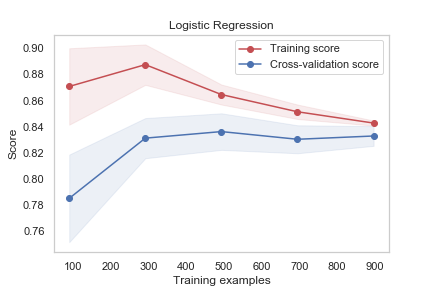

In [4]:
Image(filename = './plots_tables/Logistic_Regression.png')

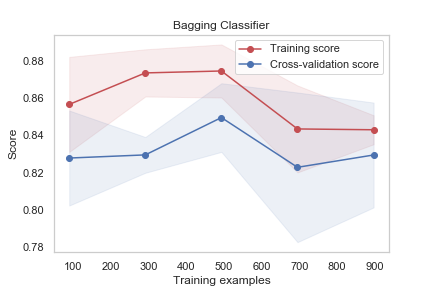

In [5]:
Image(filename = './plots_tables/Bagging_Classifier.png') 

# Question 2: Propose an amount and term

If a new client applied online

In [6]:
blended_model = pickle.load(open('./trained_models/Bagging_Classifier', 'rb'))
scaler = pickle.load(open('./scaler/scaler', 'rb'))
client = pd.read_csv('./dataset/client.csv', index_col = 0)

client

,user_id,monthly_income,monthly_outcome,total_credit_payments,payments_per_year,loan_term,loan_amount,worst_previous_delinquency,worst_previous_fraction,ratio_outcome_income,sqrt_income,sqrt_outcome,log_outcome,_will_pay_predicted
69,14128,2011464.0,547658.0,24.0,24.0,1.0,12000.0,0.0,0.0,3.672847,1418.260907,740.039188,13.213406,0


We can accept of reject a loan based on our classificatioin models. If he does not pass, we could actually offer him a differn loan amount, such that our classification predicts that he will pay:

In [7]:
for i in range(1,9):
    client.at[69,'loan_amount'] = 10**i
    cl = scaler.transform(client.drop(columns = ['user_id','_will_pay_predicted']))
    decision=blended_model.predict(cl)
    print('loan_ammount:', 10**i, ' _will_pay_prediction',decision)

loan_ammount: 10  _will_pay_prediction [0]
loan_ammount: 100  _will_pay_prediction [0]
loan_ammount: 1000  _will_pay_prediction [1]
loan_ammount: 10000  _will_pay_prediction [1]
loan_ammount: 100000  _will_pay_prediction [1]
loan_ammount: 1000000  _will_pay_prediction [1]
loan_ammount: 10000000  _will_pay_prediction [1]
loan_ammount: 100000000  _will_pay_prediction [1]


In [8]:
for i in range(1,5):
    client.at[69,'loan_amount'] = 10**4
    client.at[69,'loan_term'] = i/20
    cl = scaler.transform(client.drop(columns = ['user_id','_will_pay_predicted']))
    decision=blended_model.predict(cl)
    print('loan_term in', i*5, 'years _will_pay_prediction',decision)

loan_term in 5 years _will_pay_prediction [1]
loan_term in 10 years _will_pay_prediction [1]
loan_term in 15 years _will_pay_prediction [1]
loan_term in 20 years _will_pay_prediction [1]


# Question 3: Interest rate

Using our a large test set, we can actually estimate the losses, and its deviations, that we could have made by using our classification model, i.e. by misclassifying untrustworthy clients as trustworthy.

In [9]:
# With the test set, 

report=pd.read_csv('./dataset/interest.csv')

losses_condition= (report['_will_pay_predicted']==1) & (report['did_pay']==0)
paid_back_condition= (report['_will_pay_predicted']==1) & (report['did_pay']==1)

losses = report[losses_condition]['loan_amount'].sum()
paid_back = report[paid_back_condition]['loan_amount'].sum()

 Finally, based on this we can calculate a total interest in order to make this list of clients profitable:
 
 paid_back = loan_WihoutInterest  (1 + interest_{rate})

 loan_{WihoutInterest} * interest_{rate} > losses 

In [10]:
mininum_interest_rate=(paid_back / losses -1 )**(-1)  *100

print("""
Therefore, the total interesst rate we need in order to profit is: 
""",mininum_interest_rate, '%')


Therefore, the total interesst rate we need in order to profit is: 
 5.303309570812077 %


The anual interest rate, just need to be pay informly during the loan term.

# Conclusions and discussion

Not being an expert on finances, my approach to make this study case profitable was to minimize losses, as oppose to maximize gains. To this end, I trained several classification model that given an user past loan records, monthly income/outcome, requested loan ammount and term we can predict if the loan will be paid in its entirety. In all cases we obtained a prediction presicion above 85%.

The data mining consisted in understanding and filtering the records of users for which losses and terms can be estimated. Which then were used to train our model. Additionally, many clients were neglected because their records had feature values that contradict each other. Our complete training/test sets were reduced to 1497 records.

We found that the features that impact the most whether or not a client will pay are: loan amount and outcome/income ratio. 

We estimated the losses produced by the application of models on the test set. Based on the losses and gains, we determine the interest rate needed to make profits. For the bagging model, which does not have a variance problem, we estimated that a total interest of 5.30 % has to added to the amount requested by clients. This is fixed over time. 

Many important improvents are easy with the technoly develope, e.g.

- Spliting the datasets further into middle class and more wealth. 
- Create/test additional features
- Better understanding of the role of each feature

However, on the big picture, the critial point, from the business perspective, would be to get larger test datasets as to estimate losses and its variances accurately. In addition, we should compare these with the expectation values/variances obtained directly from our theoretical models.

Finally, it is worth mentioning the role of external factors, such as economic fluctuations, are only indirectly included through our records. Future work should address how to incorporate such risk into the interest rate. 